Regression Tests
---

import of python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

**Gerating datasets to work with**

I can generate random numbers, just like in the exercises before with the function random.rand() and save them to the variable **x**

I also multiply **x** by a factor and add an offset --> I get a linear function in **y**

In [2]:
#np.random.seed(0)
x=10*np.random.rand(20,1)   # uniform distributed samples zwischen [0,10]

y=6.3*x+15

to display the linear function $y=f(x)=b_1 \cdot x+b_0$ I plot the points:

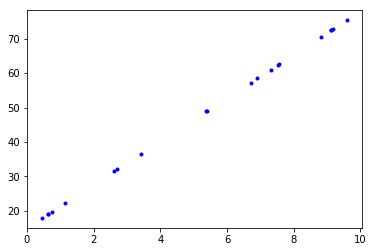

In [3]:
plt.plot(x,y,'b.')
plt.show()

all points are alligned and very regular because of the linear connection,
to make this dataset a little bit more realistic I add some random errors by random.randn() ...

In [4]:
y=y+5*np.random.randn(20,1)

and plot the points again:

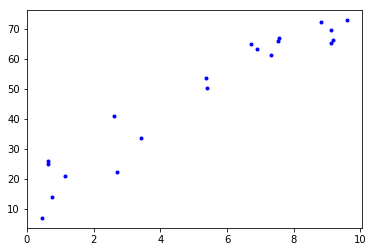

In [5]:
plt.plot(x,y,'b.')
plt.show()

Now I generated a random dataset that could have been the result of a meassurement 

In the same way I designed the linear dataset I can also define a quadratic function **yq** and add some random errors by:

In [6]:
yq = 3*x*x + 4*x + 7
yq=yq+15*np.random.randn(20,1)
#print x,y

now I can plot both datasets together:

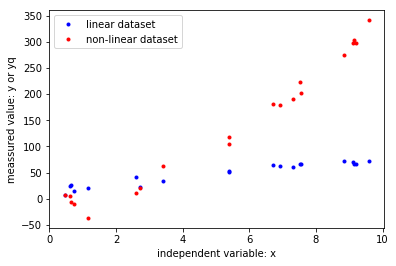

In [7]:
plt.plot(x,y,'b.',label='linear dataset')
plt.plot(x,yq,'r.',label='non-linear dataset')
plt.legend()
plt.xlabel('independent variable: x')
plt.ylabel('meassured value: y or yq')
plt.show()

Now I have two datasets a linear and non-linear one, but what could such data describe?

A linear dataset could be for example

A quadratic (non-linear) dataset can be for example

Applying a linear regression appraoch to the data by polynomial fitting 
---

Regression is a tool to **deduct** from a sampled dataset to the general **circumstances** in the data. In other words I want to know which value I can expect at the positions where I wasn't able to measure...



For a **linear function** like a line the connection of the meassured value y (dependent variable, verticale Axis) and x (independent variable, horizontal Axis) can be expressed like this: $ y = f(x) = b_0 + b_1 x $

An examplary and very simple linear dataset could look like this:

$
\begin{bmatrix}
0, & 0.7\\
1, & 0.5\\
2, & 3.9\\
3, & 3.2\\
4, & 6.0\\
5, & 8.0\\
\end{bmatrix}
$

With this function for every value-pair $(x_i, y_i)$ with $i=1...n$ an equation can be generated. From the $n$ measured values and therefor $n$ functional equations two parameters $b_0, b_1$ should be estimated. In the concrete case of $n = 6$ the  functional equations look like this:

$ y_1 = b_0 + b_1 x_1 \Longrightarrow  0.7 = b_0 + b_1 \cdot 0$ 

$ y_2 = b_0 + b_1 x_2 \Longrightarrow  0.5 = b_0 + b_1 \cdot 1$ 

$ y_3 = b_0 + b_1 x_3 \Longrightarrow  3.9 = b_0 + b_1 \cdot 2$ 

$ y_4 = b_0 + b_1 x_4 \Longrightarrow  3.2 = b_0 + b_1 \cdot 3$ 

$ y_5 = b_0 + b_1 x_5 \Longrightarrow  6 = b_0 + b_1 \cdot 4$ 

$ y_6 = b_0 + b_1 x_6 \Longrightarrow  8 = b_0 + b_1 \cdot 5$ 


the following vectors can be assigned based on that:

$\vec x^T= [x_1, x_2, ..., x_n]$ and $\vec y^T= [y_1, y_2, ..., y_n]$  as well as $\vec b^T= [b_0, b_1]$ 

In the example $ \vec x^T =[0,1,2,3,4,5 ]$, $\vec y^T=[0.7 , 0.5 , 3.9 , 3.2 , 6.8 ]$ and I'm looking for the values of $\vec b^T$.


But in general the function $y = b_0 + b_1 \cdot x $ is not fully correct, because in every meassured point a little error-value **$\epsilon$** has to be added to the functional value (e.g. compare Theory of error propagation ...)

Therefore it makes sense to extend the functional connection and to write it like this:

$y = b_0 + b_1 x + \epsilon$

if I ... this equation to $\epsilon$, I get a function of the measuring errors.

$\epsilon = y - b_0 - b_1 x $

This function only depends on the measured data:
$\epsilon =\epsilon(b_0,b_1) = y - b_0 - b_1 x $

That's why for all meassured points $(x_i,y_i)$ the individual absolute error $\epsilon_i$ can be calculated by:

$\epsilon_i = y_i - b_0 - b_1 x_i $ 



The idea at this point is to minimize all errors $\epsilon_i$ over all meassured points. Regarding the quadratic error instaed of the absolut error and summing up the quadratic terms goes back to Carl Friedrich Gauss (ca. 1795) and Adrien-Marie Legendre (ca. 1806) and became famous under the names $\textbf{Methoder der kleinsten Quadrate}$, $\textbf{Least Squares Method}$/ or $\textbf{Méthode des moindres carrés}$. Gauss found that meassuring errors in every measurement can be randomly distributed and effect therefor the meassuring results in an unwanted way by lowering ($\epsilon_i$ negativ) or extending ($\epsilon_i$ positiv) the meassured values. Random errors can't be eleminated from outside and even worse they can **eliminate** each other without the knowledge of the observer.

To work with the quadratic error is a **Worst-Case estimate** because it's always better to overestimate than underestimating an error influence.

The quadratic error is also called the L2-Norm :   $l_2(f_{\theta}(x_i),y_i)=( y_i - f_{\theta}(x_i) )^2$

So the aim is now to minimize the sum of the quadratic errors,

$\sum (\epsilon_i)^2 \rightarrow $ Min


to find a minimum of a function its fist derivative has to be set to zero. Therefor I calculate the fist derivatives
regarding both of the variables

$\frac{\partial \sum (\epsilon_i)^2}{\partial b_0 }$ and $\frac{\partial \sum (\epsilon_i)^2}{\partial b_1 }$:

$\frac{\partial \sum (\epsilon_i)^2}{\partial b_0 } = \frac{\partial \sum (y_i - b_0 - b_1 x_i)^2}{\partial b_0 }= -2 \sum(y_i - b_0 - b_1 x_i)=0 $

$\frac{\partial \sum (\epsilon_i)^2}{\partial b_1 } = \frac{\partial \sum (y_i - b_0 - b_1 x_i)^2}{\partial b_1 }= -2 \sum(y_i - b_0 - b_1 x_i) \cdot x_i=0 $ 

The factor -2 can be ignored and the Sum-equations can be changed to:

$  \sum y_i =  \sum b_0 + \sum b_1 x_i $

$  \sum y_i x_i =  \sum b_0 x_i + \sum b_1 x_i^2 $

These two equations are called the **Normal-equations**

writing these equations in a matrix syntax leads to 

$
\begin{bmatrix}
1&...&1\\
x_1&...&x_n
\end{bmatrix}
$
$
\begin{bmatrix}
y_1\\
:\\
y_n
\end{bmatrix}
$=
$
\begin{bmatrix}
n& \sum x_i\\
\sum x_i&\sum x_i^2
\end{bmatrix}
$
$\begin{bmatrix}
b_0\\
b_1
\end{bmatrix}$

and 

$
\begin{bmatrix}
1&...&1\\
x_1&...&x_n
\end{bmatrix}
$
$
\begin{bmatrix}
y_1\\
:\\
y_n
\end{bmatrix}
$=
$
\begin{bmatrix}
1&...&1\\
x_1&...&x_n
\end{bmatrix}
$
$
\begin{bmatrix}
1&x_1\\
: & :\\
1&x_n
\end{bmatrix}
$
$\begin{bmatrix}
b_0\\
b_1
\end{bmatrix}
$

I call the matrix 
A = $
\begin{bmatrix}
1&x_1\\
: & :\\
1&x_n
\end{bmatrix}
$
the **Design-Matrix** of the regression problem

I call the Vector $ \vec b =\begin{bmatrix}
b_0\\
b_1
\end{bmatrix}
$  the **parameter vector** which shall be estimated


und the Vector $ \vec y = 
\begin{bmatrix}
y_1\\
:\\
y_n
\end{bmatrix}
$ the **observations**

therefor the equation above can be written as

$A^T \vec y = A^T A \vec b$


This Matix equation is just another way of writing the **Normal-equations** from above.

The solution to derive the parameter vector $\vec b$ can be reached fully analytically by inversion of the Design-Matrix product $A^T A $

$\vec b =( A^T A )^{-1} A^T \vec y$


This simple approach can now be extended to use higher polynomal degrees (>1) by simply adding more columns to the Design-Matrix $A$ which represent the coefficients $x^m$ and extending the parameter vector $\vec b$ with the corresponding parameters $b_m$

Matrix A = $
\begin{bmatrix}
1&x_1&x_1^2&...&x_1^m\\
: & :&:& ...&:\\
1&x_n&x_n^2&...&x_n^m
\end{bmatrix}
$
and Vektor $ \vec b =\begin{bmatrix}
b_0\\
b_1\\
:\\
b_m
\end{bmatrix}$

This general approach is called polynomial fitting but makes of course only sense for lower polynomial degrees (<5) because such models are very much prone for the so called over-fitting. In other words the estimated polynom tends to fit every point in the dataset which would result in an training error =0 while acting very poorly on new testing datasets.

Minimizing the loss-function of the quadratic error leads to the closed mathematical solution from above. Beside of this 
solution there are numerous other loss-functions which can be minimized in the an equivalent way and which represent further estimation techniques for regression or classification problems (e.g. Ridge Regression, Logistic Regression,...).


After these theoretical consideration I get back to the genereted datasets from above.

The Design-Matrix for the linear Regression problem can be easily generated by this lines of code

In [8]:
A1=np.zeros((20,2))
A1[:,0]=1
A1[:,1]=np.ravel(x)
print(A1)

[[ 1.          9.12233346]
 [ 1.          3.41749836]
 [ 1.          2.60506815]
 [ 1.          5.37802812]
 [ 1.          1.14980287]
 [ 1.          9.1867632 ]
 [ 1.          0.62954777]
 [ 1.          0.4562117 ]
 [ 1.          0.63835373]
 [ 1.          9.58631784]
 [ 1.          6.70810358]
 [ 1.          0.75128616]
 [ 1.          7.55437791]
 [ 1.          7.30746305]
 [ 1.          7.5254804 ]
 [ 1.          5.38817713]
 [ 1.          9.12648345]
 [ 1.          8.83403924]
 [ 1.          6.90832749]
 [ 1.          2.70648008]]


The solution of the parameter vector $\vec b$ is done by:

In [10]:
b1=np.dot(np.linalg.inv(np.dot(A1.T,A1)),np.dot(A1.T,y))
print(b1)

[[ 15.0931049 ]
 [  6.29945104]]


the true source function I used to generate the data was $y = 6.3 \cdot x+15$ so the estimate is pretty close.

To controll the result with a build-in function of numeric python, I can use **polyfit()**

In [15]:
s,p=np.polyfit(np.ravel(x),y,1)
print( 'numpy polyfit: Slope: {} und y-offset: {}'.format(s,p))
print( 'own Estimate.: Slope: {} und y-offset: {}'.format(b1[1],b1[0]))

numpy polyfit: Slope: [ 6.29945104] und y-offset: [ 15.0931049]
own Estimate.: Slope: [ 6.29945104] und y-offset: [ 15.0931049]


**Both results are equivalent!!!**

We can now extend the Design-Matrix to describe a quadratic model by adding a column with the values of $x^2$

see the following lines of code

In [17]:
A2=np.zeros((20,3))
A2[:,0:2]=A1
A2[:,2]=np.ravel(x*x)
print(A2)

[[  1.           9.12233346  83.21696778]
 [  1.           3.41749836  11.67929503]
 [  1.           2.60506815   6.78638006]
 [  1.           5.37802812  28.92318646]
 [  1.           1.14980287   1.32204663]
 [  1.           9.1867632   84.39661811]
 [  1.           0.62954777   0.39633039]
 [  1.           0.4562117    0.20812911]
 [  1.           0.63835373   0.40749548]
 [  1.           9.58631784  91.8974897 ]
 [  1.           6.70810358  44.9986537 ]
 [  1.           0.75128616   0.56443089]
 [  1.           7.55437791  57.06862566]
 [  1.           7.30746305  53.39901626]
 [  1.           7.5254804   56.63285523]
 [  1.           5.38817713  29.03245278]
 [  1.           9.12648345  83.29270011]
 [  1.           8.83403924  78.04024938]
 [  1.           6.90832749  47.72498867]
 [  1.           2.70648008   7.32503443]]


Solving the same equation for the parameter vector b2 only by using the extended Design-Matrix results in:

In [24]:
b2=np.dot(np.linalg.inv(np.dot(A2.T,A2)),np.dot(A2.T,yq))
print(b2)

[[-14.24530803]
 [  6.84984242]
 [  3.03809201]]


checking again the results with polyfit()

In [29]:
qcoefs=np.polyfit(np.ravel(x),yq,2)
print( 'numpy polyfit: b^2: {}   b^1: {} und b^0: {}'.format(qcoefs[0],qcoefs[1],qcoefs[2]))
print( 'own Estimate.: b^2: {}   b^1: {} und b^0: {}'.format(b2[2],b2[1],b2[0]))

numpy polyfit: b^2: [ 3.03809201]   b^1: [ 6.84984242] und b^0: [-14.24530803]
own Estimate.: b^2: [ 3.03809201]   b^1: [ 6.84984242] und b^0: [-14.24530803]


and also **Both results are equivalent!!!**

make the Plots
---

In [40]:
xvals=np.arange(0,10,0.1)
yqFit=qcoefs[0]*(xvals*xvals)+qcoefs[1]*xvals+qcoefs[2]

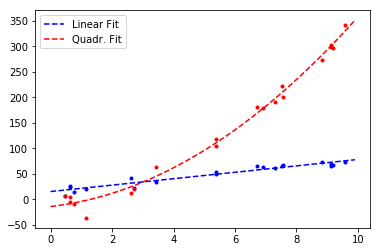

In [44]:
plt.plot(x,y,'b.',x,yq,'r.')
plt.plot(xvals,s*xvals+p,'b--',label='Linear Fit')
plt.plot(xvals,yqFit,'r--',label='Quadr. Fit')
#plt.xlim(0,10)
#plt.ylim(-40,350)
plt.legend(loc='best')
plt.show()